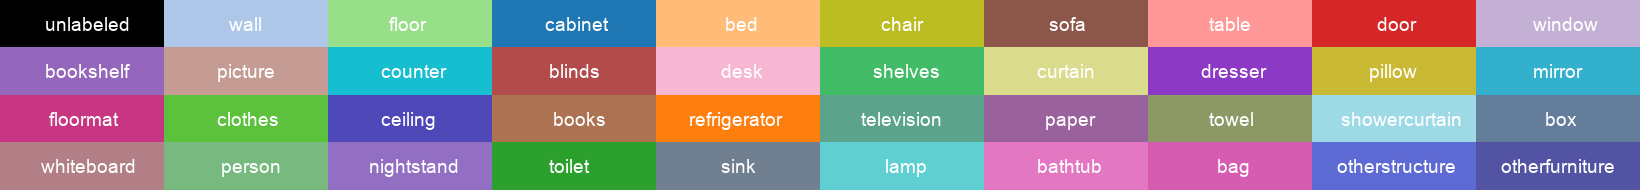

In [1]:
import os
import sys
from pathlib import Path

ASL = os.path.join(str(Path.home()), "ASL")
src = os.path.join(str(Path.home()), "ASL", "src")
os.chdir( ASL )
sys.path.append(ASL)
sys.path.append(src)


from lightning import Network
from utils_asl import load_yaml
from visu import Visualizer

vi = Visualizer(p_visu="test")

textwidth = 12.7 #cm


import matplotlib
import matplotlib.pyplot as plt
import skimage
from PIL import Image, ImageDraw
import imageio 
import numpy as np
import torch
import cv2
import pandas
from visu import *

h,w = 190, 1640
arr = np.zeros ( (h,w) )
for i in range(40):
   w_idx = i % 10
   h_idx = int( i/10 )
   arr[ int( (h/4) * h_idx) : int( (h/4)*(h_idx+1)), int( (w/10) * w_idx) : int( (w/10)*(w_idx+1))] = i

arr

ma = vi.plot_detectron( np.zeros( (h,w,3) ) , arr , alpha=1, text_off=False, jupyter=True,  draw_bound=False, font_size= 19, shift= 4)

In [2]:
from datasets_asl import MLHypersim
from datasets_asl import ScanNet

mld = MLHypersim(
    root = "/home/jonfrey/Datasets/mlhypersim",
    mode="train",
    scenes=["ai_000_000"],
    output_trafo=None,
    output_size=(480,640),
    degrees=0,
    flip_p=0,
    jitter_bcsh=[0, 0, 0, 0],
    data_augmentation=False    
)

img, label, img_ori = mld[0]

ml =  [ Image.fromarray( np.uint8( mld[k][2].permute(1,2,0).numpy() * 255 ) ) for k in [0,410,1010]  ]

ml_l =  [ Image.fromarray(vi.plot_detectron(mld[k][2],mld[k][1]+1, text_off =True, jupyter=False,  draw_bound=False))
       for k in [0,410,1010]  ]
       
snd = ScanNet(
    root="/home/jonfrey/Datasets/scannet",
    mode="val",
    scenes=[],
    output_trafo=None,
    output_size=(480, 640),
    degrees=10,
    flip_p=0.5,
    jitter_bcsh=[0.3, 0.3, 0.3, 0.05]
  )

sn =  [ Image.fromarray( np.uint8( snd[k][2].permute(1,2,0).numpy() * 255 ) ) for k in [0,1140,2000]  ]
sn_l =  [ Image.fromarray(vi.plot_detectron(snd[k][2],snd[k][1]+1,alpha=0.85, text_off =True, jupyter=False,  draw_bound=False))
       for k in [0,1140,2000]  ]

Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1060.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1060.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1070.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1070.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1080.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1080.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1090.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1090.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1100.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/color/1100.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/label-filt/1110.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0070_00/c

Image not found  /home/jonfrey/Datasets/scannet/scans/scene0089_02/color/1190.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/label-filt/430.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/color/430.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/label-filt/440.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/color/440.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/label-filt/450.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/color/450.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/label-filt/460.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/color/460.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/label-filt/470.png
Image not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/color/470.jpg
Label not found  /home/jonfrey/Datasets/scannet/scans/scene0090_00/label-filt/480.p

In [ ]:
for s in [ ["ai_001_001"], ["ai_002_001"], ["ai_003_001"],
          ["ai_004_001"]]:
        
    W, H = 640,480
    mld = MLHypersim(
        root = "/home/jonfrey/Datasets/mlhypersim",
        mode="train",
        scenes=s,
        output_trafo=None,
        output_size=(H,W),
        degrees=0,
        flip_p=0,
        jitter_bcsh=[0, 0, 0, 0],
        data_augmentation=False    
    )
    mld.replay = False
    from cv2 import VideoWriter, VideoWriter_fourcc
    import cv2
    FPS = 2

    #fourcc = VideoWriter_fourcc("M", "J", "P","G")
    #video = VideoWriter(f'/home/jonfrey/Videos/hypersim_labe_{s[0]}.avi', fourcc, float(FPS), (W,H))
    
    fourcc2 = VideoWriter_fourcc("M", "J", "P","G")
    video2 = VideoWriter(f'/home/jonfrey/Videos/hypersim_images_{s[0]}.avi', fourcc2, float(FPS), (W,H))
    
    
    filt = np.array( [255**2, 255**1,1])[None,None,:].repeat(H,0).repeat(W,1)
    visu = Visualizer("/home/jonfrey/Documents/hypersim_examples/", logger=None, epoch=0, store=False, num_classes=41)
    print(s,len(mld))

    import cv2
    for i in  range( 0,len( mld  ),1 ):
        visu.epoch = i 
        #ml =  np.uint8( mld[i][2].permute(1,2,0).numpy() * 255 ) 
        ml_l =  vi.plot_detectron(mld[i][2],mld[i][1]+1, text_off =True, jupyter=False,  draw_bound=True, tag=s[0], store=False)
        
        #t =  vi.plot_image(  ml, tag=s[0], store=False)
        
        print(i)
        
        #img = Image.fromarray(t)
        #img.save(f"/home/jonfrey/Documents/hypersim_examples/img_{i}_{s[0]}.png")
        #r, g, b = img.split()
        #img = np.array( Image.merge("RGB", (b, g, r)) )
        #video.write(img)
        
        img = Image.fromarray(ml_l )
        #img.save(f"/home/jonfrey/Documents/hypersim_examples/label_{i}_{s[0]}.png")
        #img = Image.fromarray(ml)
        r, g, b = img.split()
        img = np.array( Image.merge("RGB", (b, g, r)) )
        
        video2.write(img)
        #print(i)
    video2.release()    
    #video.release()

In [29]:
def add(i):
    r = np.concatenate( [np.array( i ) , np.full( (480,90,3) ,255 ) ] , axis=1)
    return Image.fromarray(np.uint8(r))


<ipython-input-34-66f4c523bb74>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


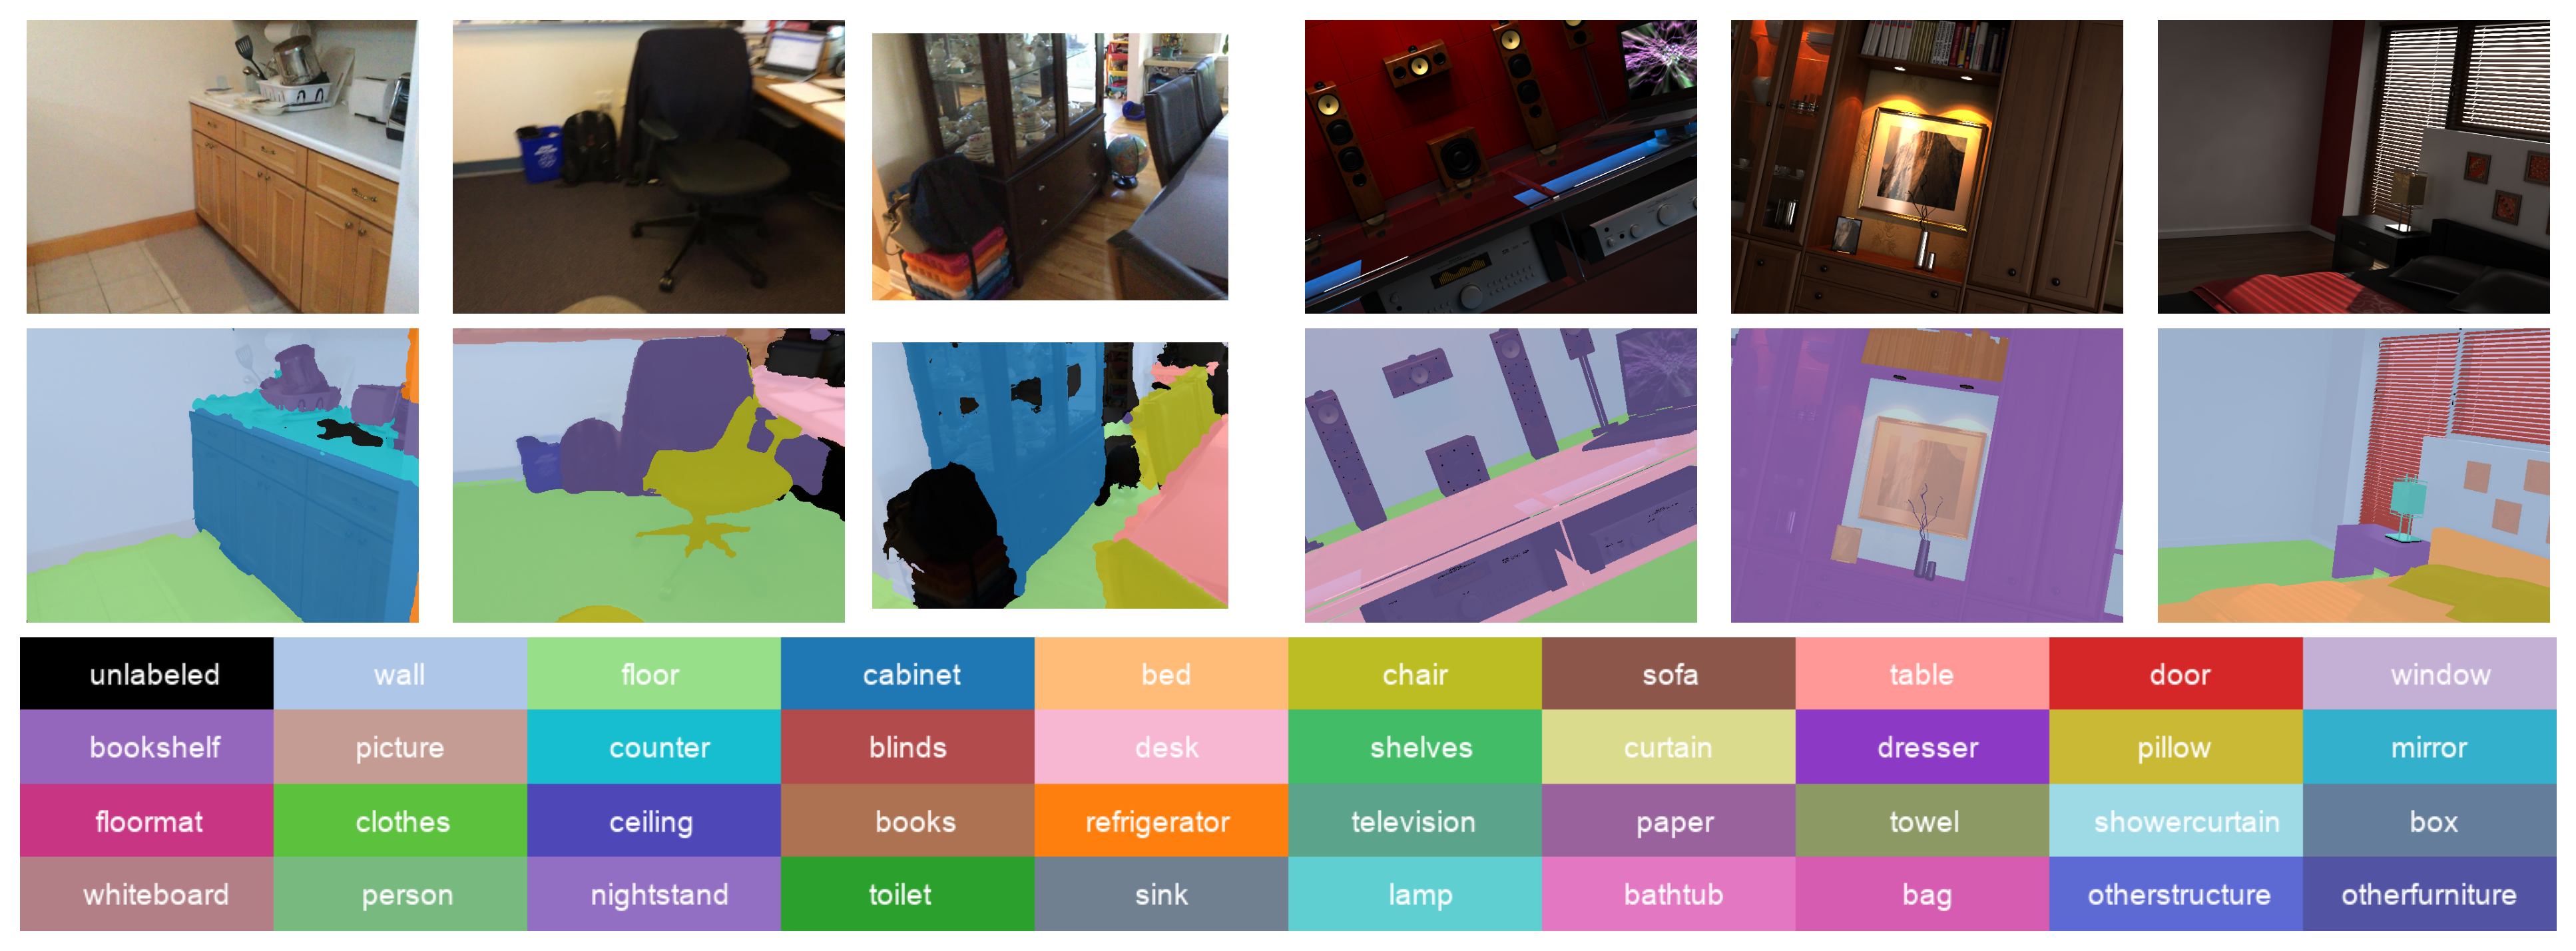

In [34]:
left  = 0  # the left side of the subplots of the figure
right = 1    # the right side of the subplots of the figure
bottom = 0.025   # the bottom of the subplots of the figure
top = 0.975      # the top of the subplots of the figure
wspace = 0.05   # the amount of width reserved for blank space between subplots
hspace = 0.05  # the amount of height reserved for white space between subplots

# fig, axs = plt.subplots(3, 6 , figsize=(textwidth,3.3))

fig = plt.figure(figsize=(textwidth,4.8))
gs = fig.add_gridspec(3,6)

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)



    
fig.add_subplot(gs[0, 3]).imshow( ml[0] )
fig.add_subplot(gs[0, 4]).imshow( ml[1] )
fig.add_subplot(gs[0, 5]).imshow( ml[2] )
fig.add_subplot(gs[0, 0]).imshow( sn[0] )
fig.add_subplot(gs[0, 1]).imshow( sn[1] )
fig.add_subplot(gs[0, 2]).imshow( sn[2] )

fig.add_subplot(gs[1, 3]).imshow( ml_l[0] )
fig.add_subplot(gs[1, 4]).imshow( ml_l[1] )
fig.add_subplot(gs[1, 5]).imshow( ml_l[2] )
fig.add_subplot(gs[1, 0]).imshow( sn_l[0] )
fig.add_subplot(gs[1, 1]).imshow( sn_l[1] )
fig.add_subplot(gs[1, 2]).imshow( sn_l[2])

fig.add_subplot(gs[2, :]).imshow( ma )

for ax in plt.gcf().get_axes():
    ax.set(xlabel='x-label', ylabel='y-label')
    ax.axis('off')
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

fig.show()
from matplotlib.backends.backend_agg import FigureCanvasAgg
def get_img_from_fig(fig, dpi=180):
  fig.set_dpi(dpi)
  canvas = FigureCanvasAgg(fig)
  # Retrieve a view on the renderer buffer
  canvas.draw()
  buf = canvas.buffer_rgba()
  # convert to a NumPy array
  buf = np.asarray(buf)
  buf = Image.fromarray(buf)
  buf = buf.convert("RGB")
  return buf

res = get_img_from_fig(fig, dpi=300)
imageio.imwrite( 'docs/scannet_hypersim_examples.png', res)

In [42]:
for j,i in enumerate(ml):
    i.save("/home/jonfrey/ASL/docs/out_examples/ml"+str(j)+".png")
    
for j,i in enumerate(sn):
    i.save("/home/jonfrey/ASL/docs/out_examples/sn"+str(j)+".png")
    
for j,i in enumerate(ml_l):
    i.save("/home/jonfrey/ASL/docs/out_examples/ml_l"+str(j)+".png")
    
for j,i in enumerate(sn_l):
    i.save("/home/jonfrey/ASL/docs/out_examples/sn_l"+str(j)+".png")

Image.fromarray(ma).save( "/home/jonfrey/ASL/docs/out_examples/color.png")